In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib widget

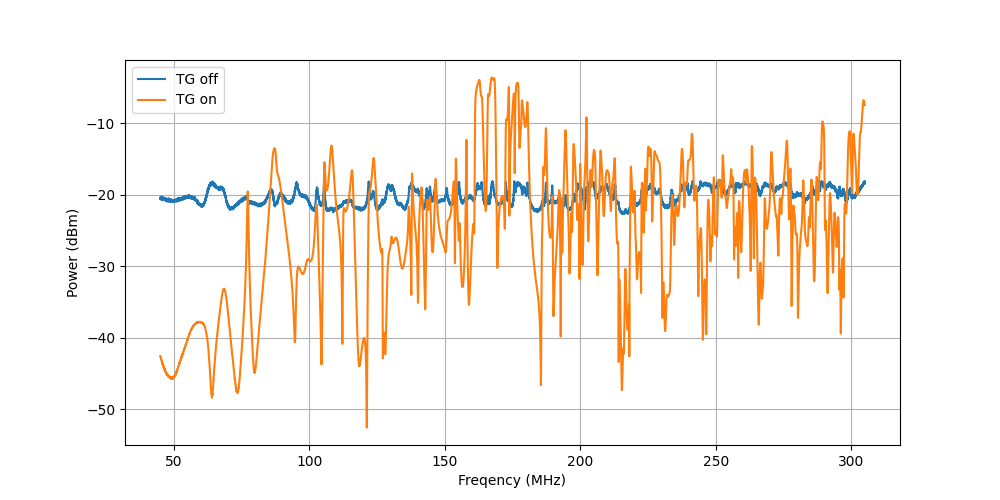

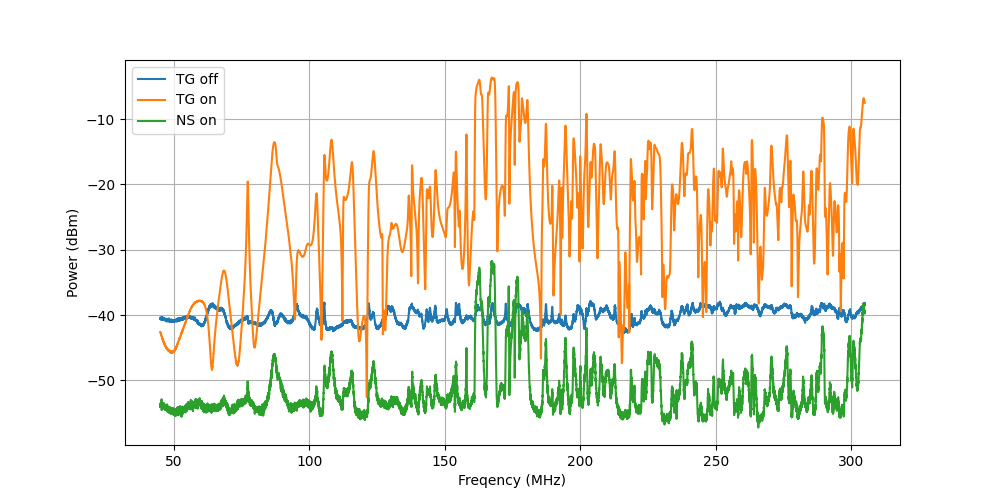

In [51]:
freqs   = np.load('data/TG_off_RBW10k_10dBatt_8_9_23.npy')[:, 0] 
TG_off  = np.load('data/TG_off_RBW10k_10dBatt_8_9_23.npy')[:, 1] 
TG_on   = np.load('data/TG_on_n40_12dbAtt_RBW10k_10dBatt_8_9_23.npy')[:, 1] 
NS_on   = np.load('data/siglentNoiseSoruce_on_n542mv_0dbAtt_RBW10k_10dBatt_8_9_23.npy')[:, 1] 

freqs = np.linspace(45,305,10000)

plt.close('all')
plt.figure(figsize=(10,5))
plt.plot(freqs, TG_off+50, label = 'TG off')
plt.plot(freqs, TG_on, label = 'TG on')
#plt.plot(freqs, NS_on+32, label = 'NS on+32')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(freqs, TG_off+30, label = 'TG off')
plt.plot(freqs, TG_on, label = 'TG on')
plt.plot(freqs, NS_on, label = 'NS on')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()

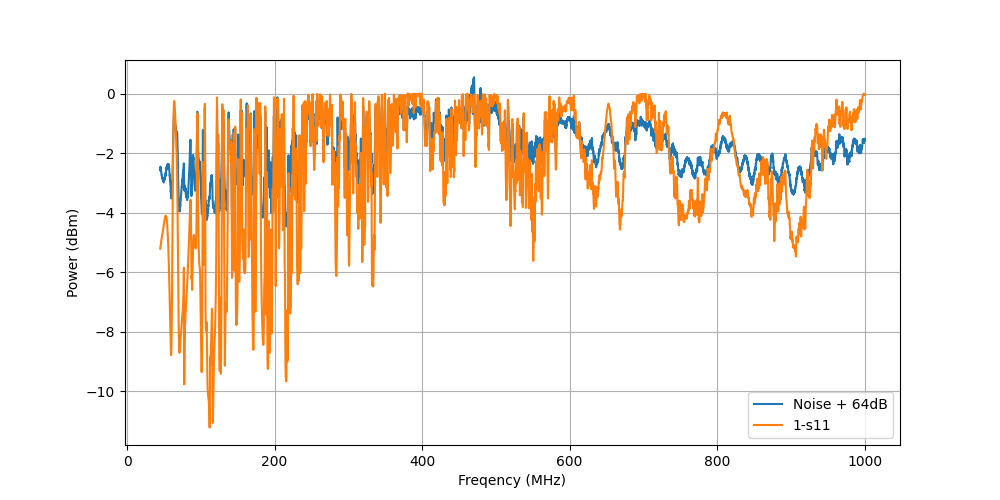

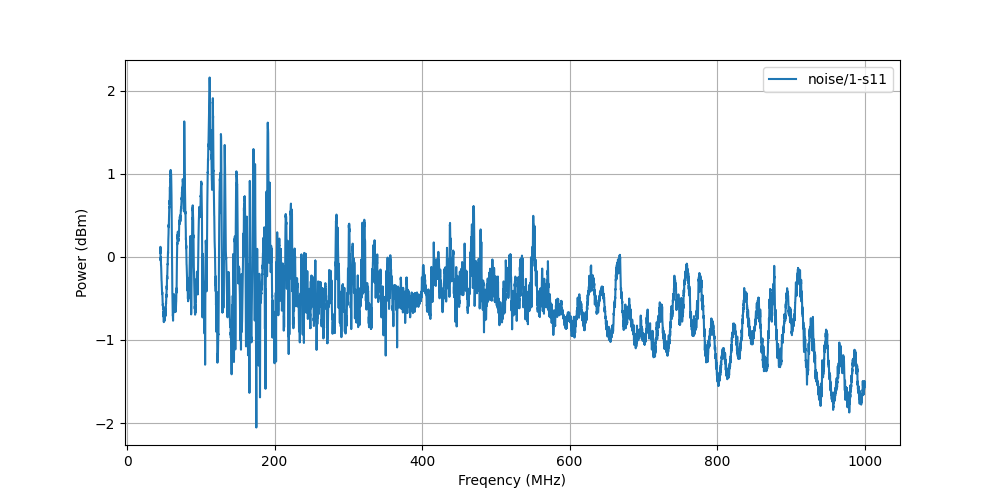

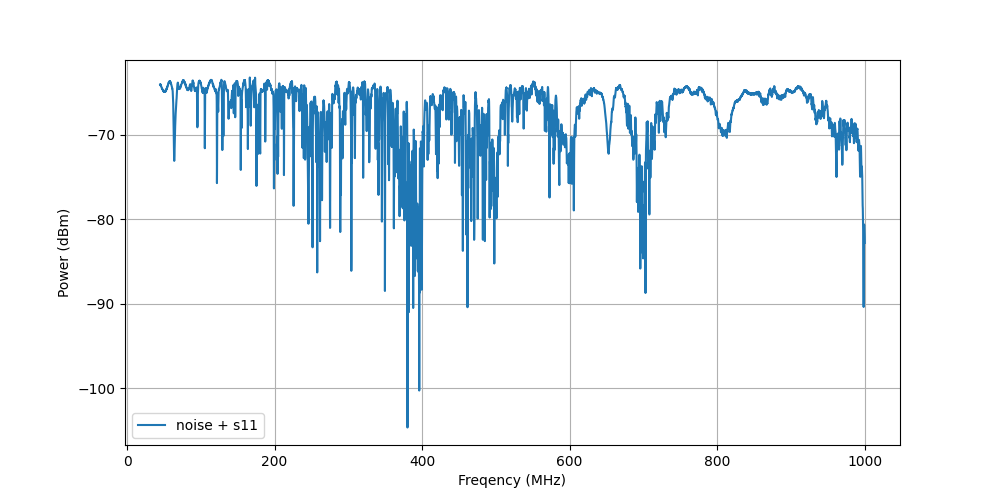

In [59]:
#1GHz span with s11 data

#freqs           = np.load('data/TG_off_RBW100k_freq45_1005MHz_8_10_23.npy')[:, 0]/1e6
TG_off          = np.load('data/TG_off_RBW100k_freq45_1005MHz_8_10_23.npy')[:, 1] 
TG_on           = np.load('data/TG_on_n40dBm_60dBatt_RBW100k_freq45_1005MHz_8_10_23.npy')[:, 1] 
s11_df          = pd.read_csv('data/s11_8_11_23.csv')

freqs = np.linspace(45,1000,10000)

s11_mag_interp = np.interp(freqs, s11_df['Frequency']/1e6, s11_df['S11_Magnitude'])

plt.close('all')
plt.figure(figsize=(10,5))
plt.plot(freqs, TG_off+60, label = 'Noise + 64dB')
#plt.plot(freqs, -s11_mag_interp, label = '1/s11')
plt.plot(freqs, 10*np.log10(1-(10**((s11_mag_interp)/20))**2), label = '1-s11')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))


plt.plot(freqs, TG_off+64 - (4+5*np.log10(1-10**((s11_mag_interp**1)/10))), label = 'noise/1-s11')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
#plt.plot(freqs, TG_off + 60, label = 'noise')
#plt.plot(freqs, s11_mag_interp, label = 's11 mag')
plt.plot(freqs, (TG_off)+s11_mag_interp, label = 'noise + s11')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()

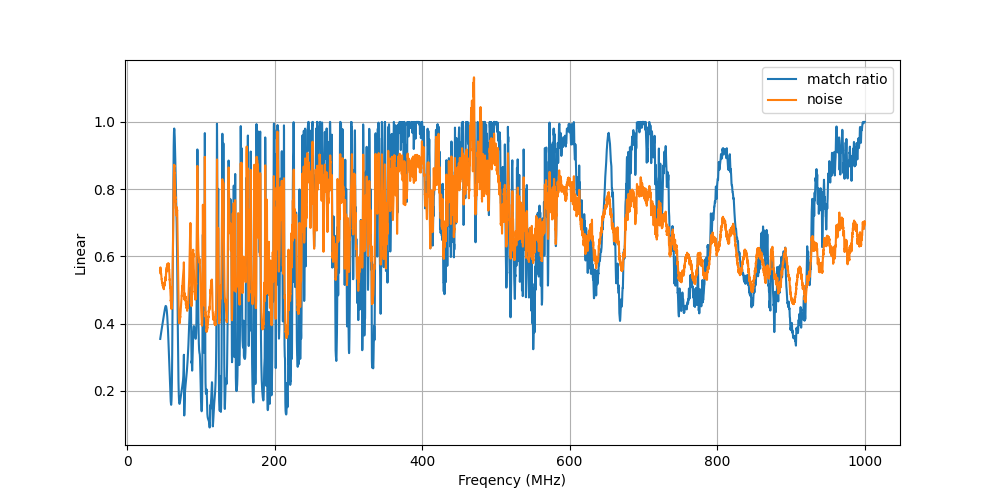

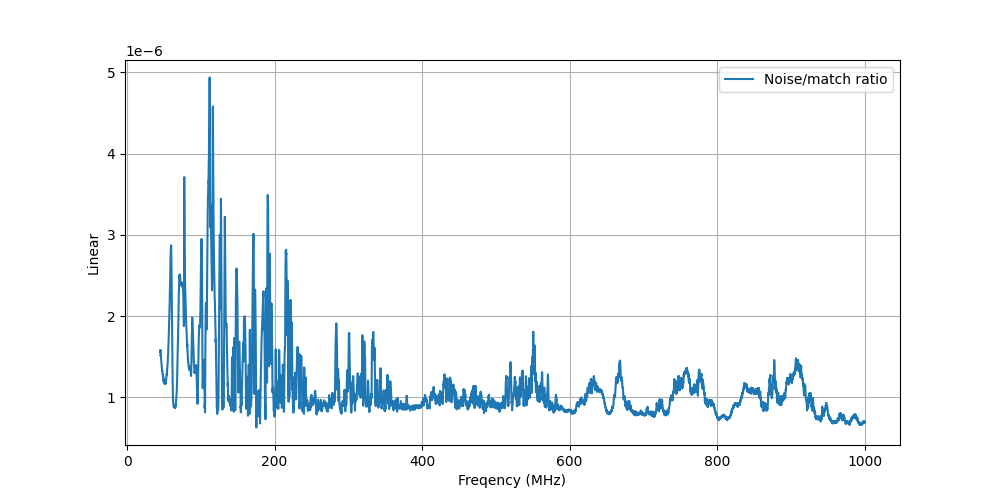

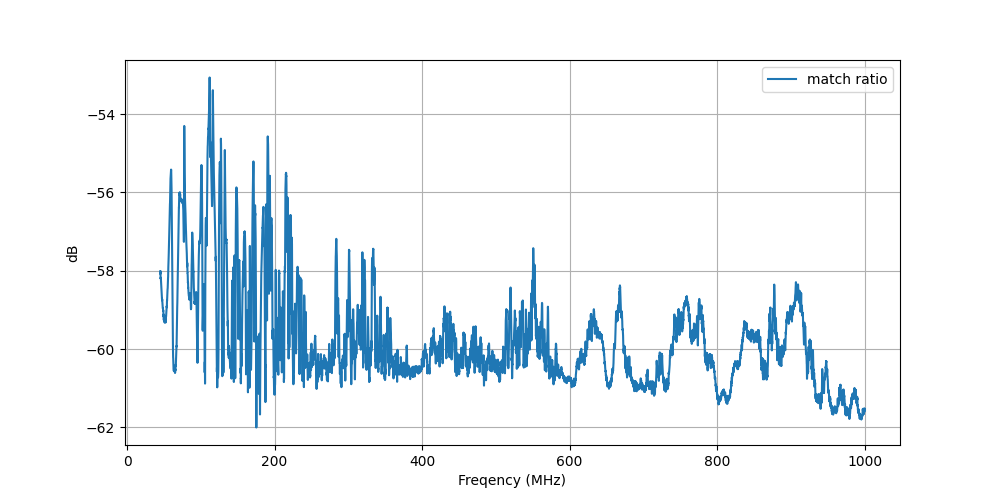

1.232645720625572e-06
312.4267426742674


In [43]:
s11_ant_lin     = 10**(s11_mag_interp/20)
#s11_ant_lin     = s11_mag_interp
s11_sys         = 0.1
M = (1-s11_ant_lin**2)*(1-s11_sys**2)/(1-s11_ant_lin*s11_sys)**2


plt.close('all')


plt.figure(figsize=(10,5))
plt.plot(freqs,(M), label = 'match ratio')
plt.plot(freqs, 10**(TG_off/10)*10**6.0, label = 'noise')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Linear')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(freqs,10**(TG_off/10)/M, label = 'Noise/match ratio')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Linear')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(freqs,10*np.log10(10**(TG_off/10)/M), label = 'match ratio')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('dB')
plt.grid()
plt.show()

print(np.median((10**(TG_off/10)/M)[0:2800]))
print(freqs[2800])

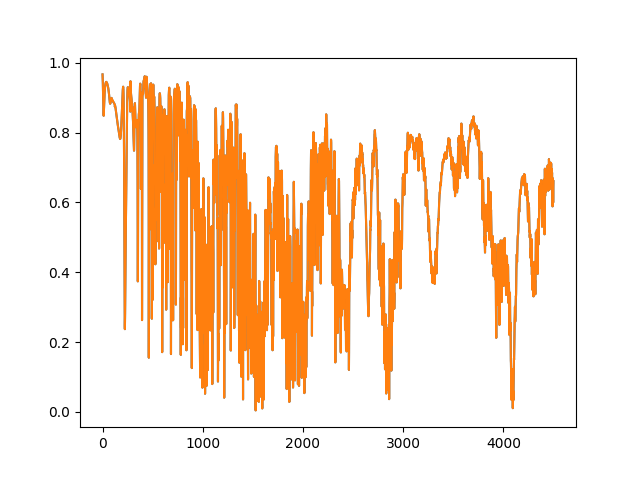

In [18]:
plt.figure()
plt.plot(s11_df['S11_Magnitude (linear)'])
plt.plot(10**(s11_df['S11_Magnitude']/20))
plt.show()


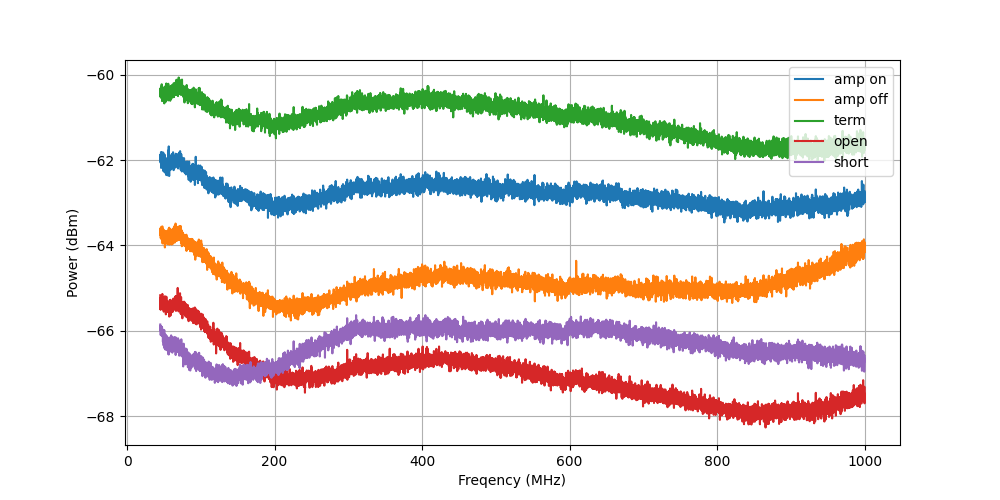

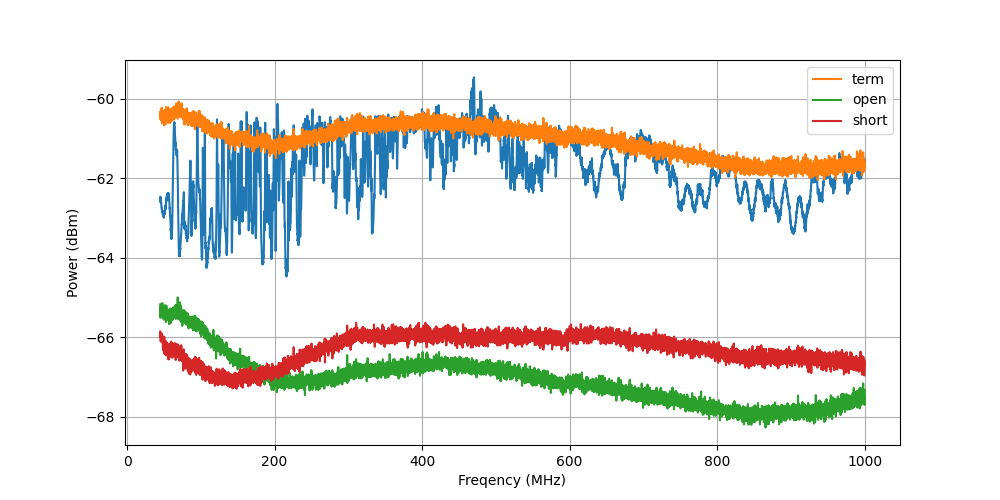

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


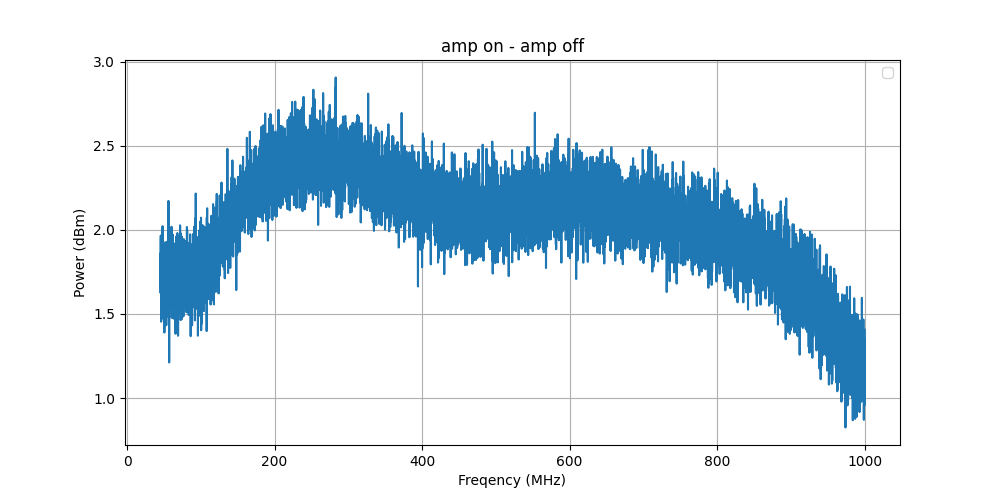

In [46]:
ampOn       = np.load('data/ampMc_input_ampOn_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]
ampOff      = np.load('data/ampMc_input_ampOff_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]
pnackAmpOff = np.load('data/ampMc_input_ampOff_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]
term        = np.load('data/term_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]
open        = np.load('data/open_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]
short        = np.load('data/short_RBW100k_freq45_1005MHz_8_11_23.npy')[:,1]



plt.close('all')
plt.figure(figsize=(10,5))
plt.plot(freqs, ampOn, label = 'amp on')
plt.plot(freqs, ampOff, label = 'amp off', alpha = 1)
plt.plot(freqs, term, label = 'term', alpha = 1)
plt.plot(freqs, open, label = 'open', alpha = 1)
plt.plot(freqs, short, label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()



plt.figure(figsize=(10,5))
plt.plot(freqs, TG_off)
plt.plot(freqs, term, label = 'term', alpha = 1)
plt.plot(freqs, open, label = 'open', alpha = 1)
plt.plot(freqs, short, label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
plt.title('amp on - amp off')
plt.plot(freqs, ampOn-ampOff)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()

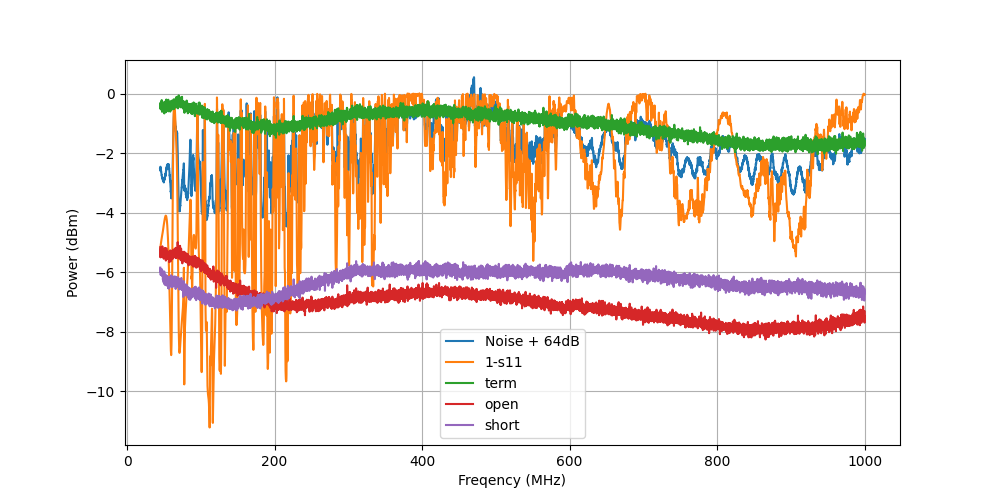

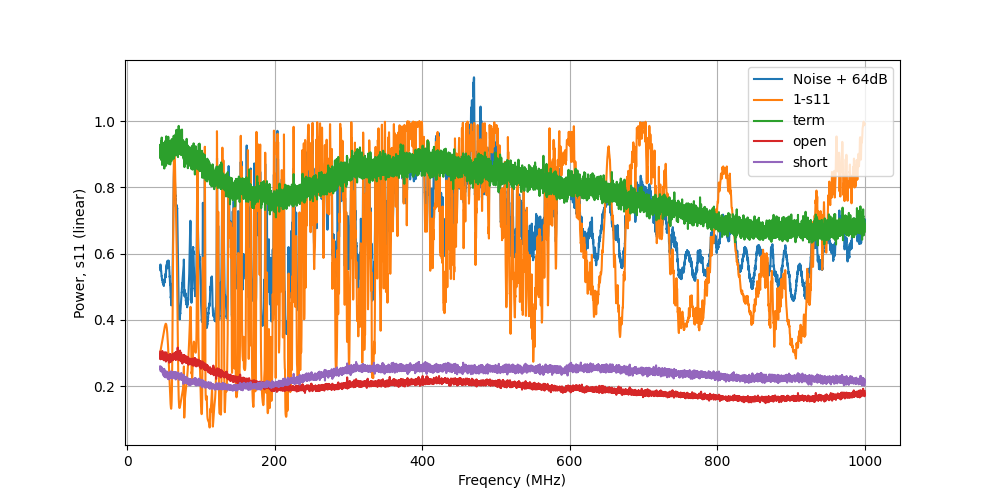

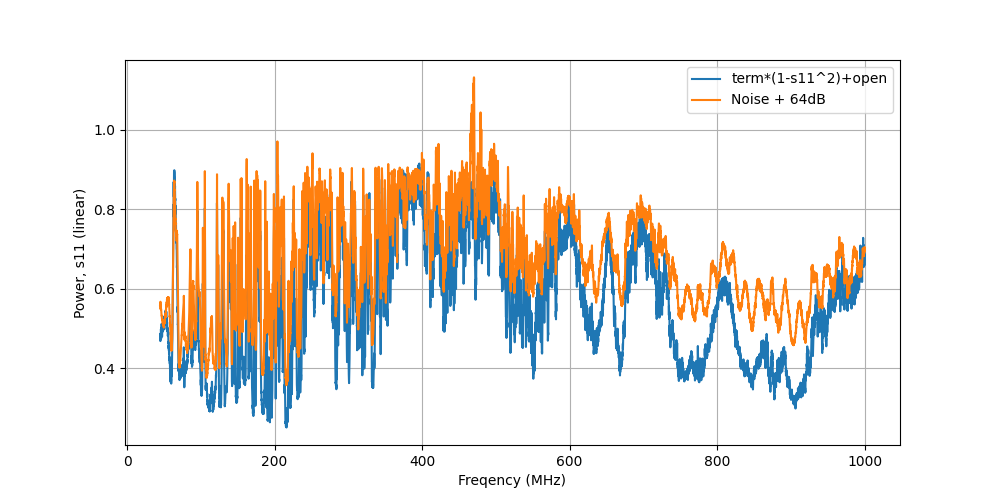

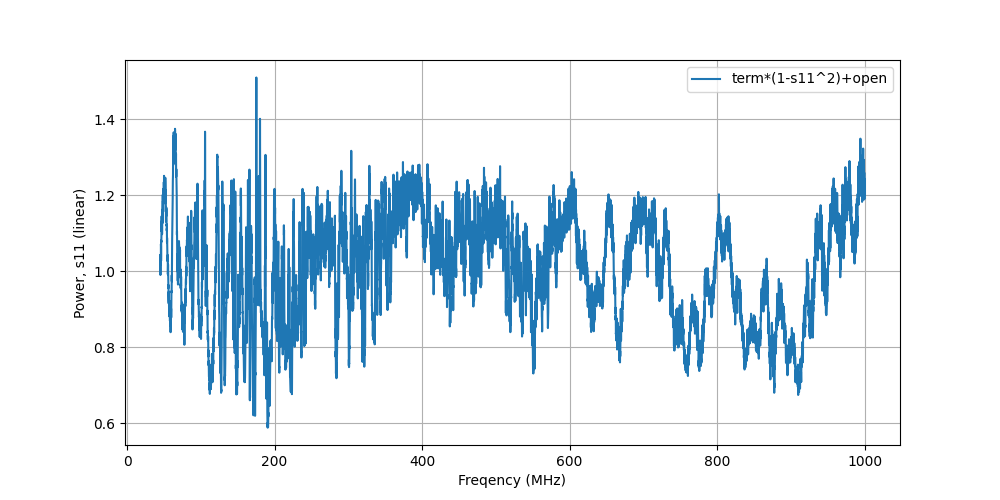

In [84]:
plt.close('all')
plt.figure(figsize=(10,5))
plt.plot(freqs, TG_off+60, label = 'Noise + 64dB')
#plt.plot(freqs, -s11_mag_interp, label = '1/s11')
plt.plot(freqs, 10*np.log10(1-(10**((s11_mag_interp)/20))**2), label = '1-s11')
plt.plot(freqs, term+60, label = 'term', alpha = 1)
plt.plot(freqs, open+60, label = 'open', alpha = 1)
plt.plot(freqs, short+60, label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(freqs, 10**((TG_off+60)/10), label = 'Noise + 64dB')
#plt.plot(freqs, -s11_mag_interp, label = '1/s11')
plt.plot(freqs,(1-(10**((s11_mag_interp)/20))**2), label = '1-s11')
plt.plot(freqs, 10**((term+60)/10), label = 'term', alpha = 1)
plt.plot(freqs, 10**((open+60)/10), label = 'open', alpha = 1)
plt.plot(freqs, 10**((short+60)/10), label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(freqs, ((10**((term+60)/10)-10**((open+60)/10))*(1-(10**((s11_mag_interp)/20))**2))+10**((open+60)/10), label = 'term*(1-s11^2)+open')
plt.plot(freqs, 10**((TG_off+60)/10), label = 'Noise + 64dB')
#plt.plot(freqs, -s11_mag_interp, label = '1/s11')
#plt.plot(freqs,(1-(10**((s11_mag_interp)/20))**2), label = '1-s11')
#plt.plot(freqs, 10**((term+60)/10), label = 'term', alpha = 1)
#plt.plot(freqs, 10**((open+60)/10), label = 'open', alpha = 1)
#plt.plot(freqs, 10**((short+60)/10), label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(freqs, ((10**((term+60)/10)*(1-(10**((s11_mag_interp)/20))**2))+10**((open+60)/10))/10**((TG_off+60)/10), label = 'term*(1-s11^2)+open')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

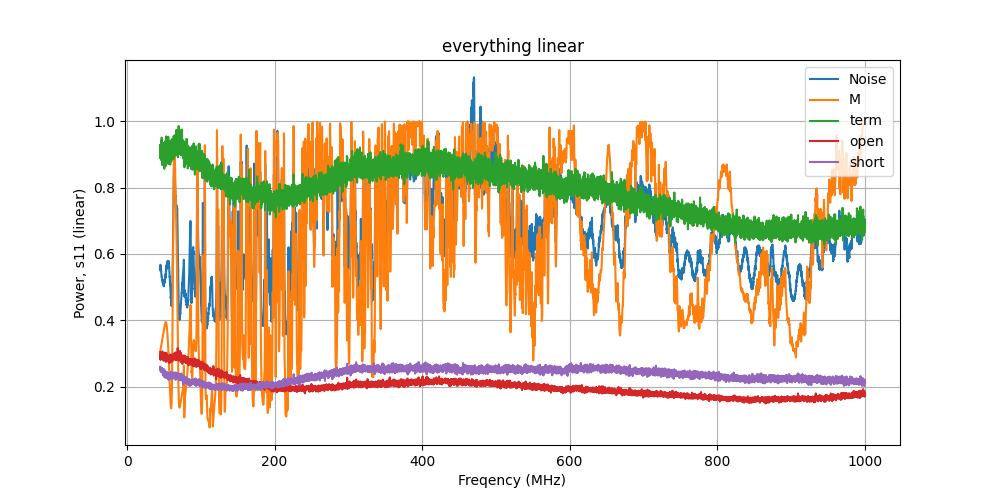

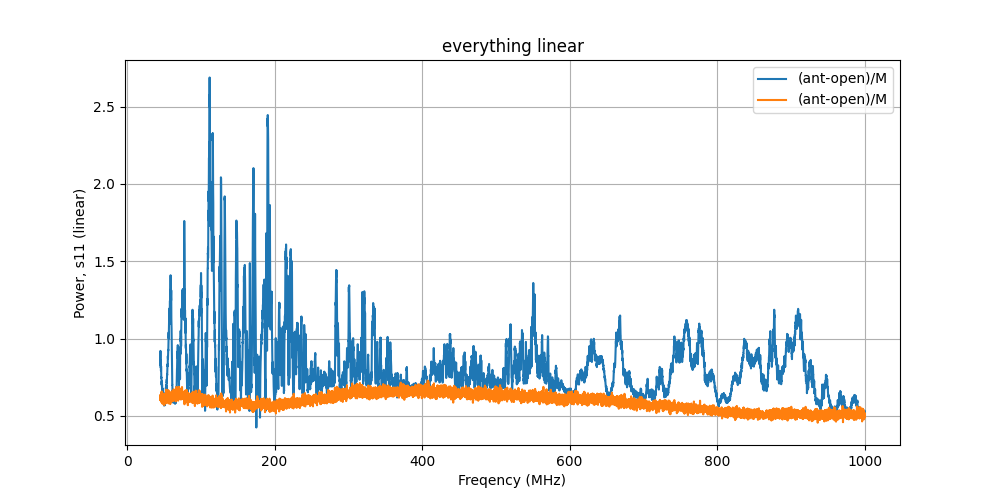

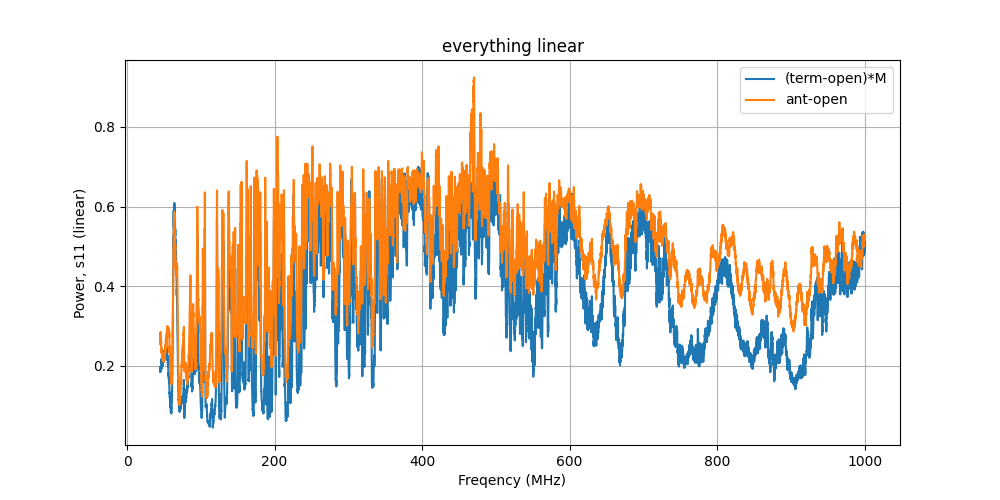

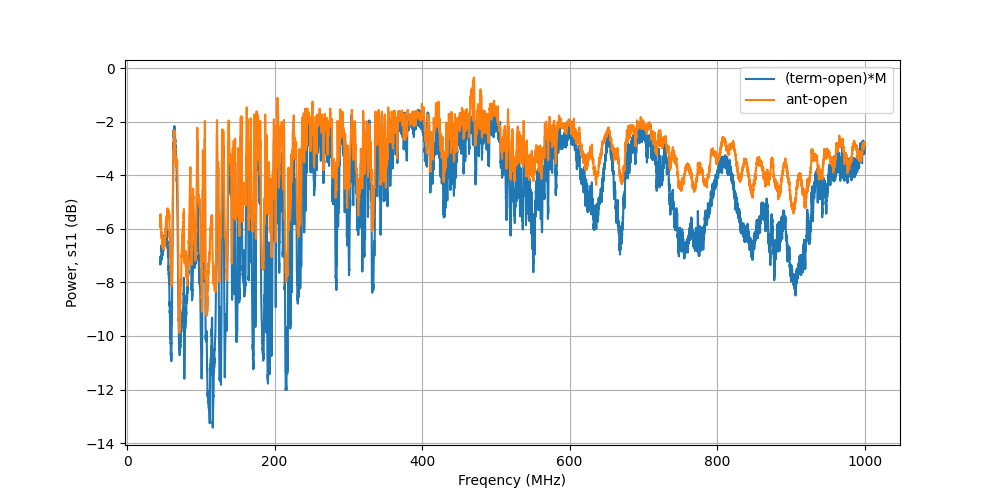

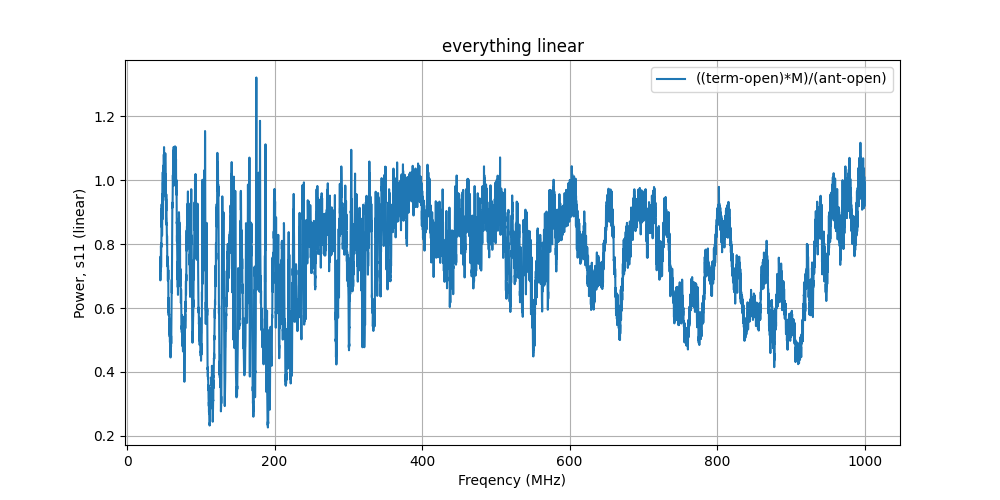

In [95]:
s11_ant_lin     =10**((s11_mag_interp)/20)
s11_sys         = 0.01

#M              = (1-s11_ant_lin)**2

M = (1-s11_ant_lin**2)*(1-s11_sys**2)/(1-s11_ant_lin*s11_sys)**2


term_lin    = 10**((term+60)/10)
open_lin    = 10**((open+60)/10)
short_lin   = 10**((short+60)/10)
ant_noise   = 10**((TG_off+60)/10)



plt.close('all')
plt.figure(figsize=(10,5))
plt.title('everything linear')
plt.plot(freqs, ant_noise, label = 'Noise')
plt.plot(freqs,M, label = 'M')
plt.plot(freqs, term_lin, label = 'term', alpha = 1)
plt.plot(freqs, open_lin, label = 'open', alpha = 1)
plt.plot(freqs, short_lin, label = 'short', alpha = 1)
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.title('everything linear')
plt.plot(freqs, (ant_noise-open_lin)/M, label = '(ant-open)/M')
plt.plot(freqs, (term_lin-open_lin), label = '(ant-open)/M')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.title('everything linear')
plt.plot(freqs, (term_lin-open_lin)*M, label = '(term-open)*M')
plt.plot(freqs, ant_noise-open_lin, label = 'ant-open')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.title('')
plt.plot(freqs, 10*np.log10((term_lin-open_lin)*M), label = '(term-open)*M')
plt.plot(freqs, 10*np.log10(ant_noise-open_lin), label = 'ant-open')
plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (dB)')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
plt.title('everything linear')
plt.plot(freqs, ((term_lin-open_lin)*M)/(ant_noise-open_lin), label = '((term-open)*M)/(ant-open)')

plt.legend()
plt.xlabel('Freqency (MHz)')
plt.ylabel('Power, s11 (linear)')
plt.grid()
plt.show()